# HW5: 4th-order Runge-Kutta (rk4)

For each $x_i$ and $t_i$ we define four different coordinates:
\begin{eqnarray*} \label{eq:rk}
&x1 = x_i &~~~t1 = t_i \\
&x2 = x_i + \tfrac{1}{2} f(x1,t1)\Delta t &~~~t2 = t_i + \tfrac{1}{2} \Delta t \\
&x3 = x_i + \tfrac{1}{2} f(x2,t2)\Delta t &~~~t3 = t_i + \tfrac{1}{2} \Delta t \\
&x4 = x_i + f(x3,t3)\Delta t &~~~t4 = t_i + \Delta t
\end{eqnarray*}

With these values defined we are now ready to execute the next time step:

\begin{equation*}
x_{i+1} = x_i + \tfrac{1}{6} (f(x1,t1) + 2f(x2,y2) + 2f(x3,y3) + f(x4,t4)) \Delta t
\end{equation*}


- Repeat the last part of Lab 2 (trunctation error), solving the dimensionless ODE, comparing the %error at $\tau = 1$ . Plot \%error vs. $d \tau$. Is 4th-order Runge-Kutta $\propto \Delta t^4$  (plot log-log)?  Hint, I found the error for rk4 can be extremely small so that the linear relation failed for very small $\Delta \tau$.

dtau array = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]
slope 4th order = [4.07570121]


Text(0, 0.5, '% Error')

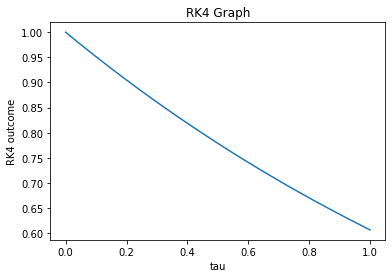

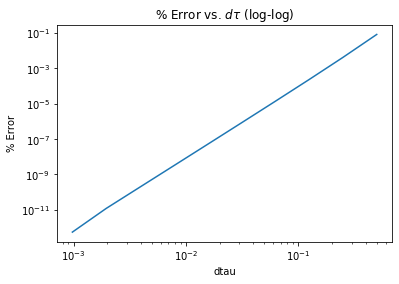

In [4]:
#Name: Jasmine Kobayashi
#Date: 2/18/20
#HW5: RK4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#---------------------------------------------------------------------------------------------------------------------------
def F(y0):
    return -y0
#4th order Runge-Kutta (dimensionless)
def rk4(F,xn,tau,dtau):
    x = []
    for n in range(0,len(tau)):
        x.append(xn)
        k1 = dtau*F(xn)
        k2 = dtau*F(xn + 0.5*k1)
        k3 = dtau*F(xn + 0.5*k2)
        k4 = dtau*F(xn + k3)
        xn += (k1 + 2*k2 + 2*k3 + k4)/6.
    return x
#---------------------------------------------------------------------------------------------------------------------------
#most of following = copied/similar structure of things from Exercise 2 of lab 4
xn = 1.0
tau_final = 1.0
dtau = 0.5                         #b/c of issue w/ really small dtau's, made initial dtau a bit bigger
dtau_array = []
for i in range(10):                #Also decreased number of times dtau was divided by 2, to keep larger dtau values(kinda)
    dtau_array.append(dtau)
    dtau = dtau/2
print("dtau array =",dtau_array)

#% Error Calculations/arrays
dy_array = []
for j in range(len(dtau_array)):
    tau = np.arange(0,tau_final+dtau_array[j],dtau_array[j])
    y = rk4(F,xn,tau,dtau_array[j])
    dy_array.append(100*(abs(y[-1]-np.exp(-tau[-1]))/np.exp(-tau[-1])))

#Linear Regression  
model=LinearRegression()
x = np.log(dtau_array)
x = x.reshape((-1,1))           
model.fit(x,np.log(dy_array))
print('slope 4th order =', model.coef_)
#graphs
plt.figure(1)
plt.plot(tau,rk4(F,xn,tau,dtau))
plt.title("RK4 Graph")
plt.xlabel("tau")
plt.ylabel("RK4 outcome")
plt.figure(2)
plt.plot(dtau_array,dy_array)
plt.yscale('log')
plt.xscale('log')
plt.title("% Error vs. $d\\tau$ (log-log)")
plt.xlabel("dtau")
plt.ylabel("% Error")